In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pycontrails.core import MetDataset
from pycontrails.datalib.ecmwf import ERA5
from pycontrails.models.cocipgrid import CocipGrid
from pycontrails.models.humidity_scaling import HistogramMatching
from pycontrails.models.ps_model import PSGrid

In [37]:
# Set up time and spatial bounds for the model run
time_bounds = ("2022-03-01", "2022-03-02")
lon_bounds = (-115, -95)
lat_bounds = (30, 50)
pressure_levels = [250, 300]  # hPa

In [48]:
# Download meteorological data
era5 = ERA5(time_bounds, pressure_levels=pressure_levels, variables=CocipGrid.met_variables)
met = era5.open_metdataset()

era5_rad = ERA5(time_bounds, variables=CocipGrid.rad_variables)
rad = era5_rad.open_metdataset()

In [39]:
# Initialize CocipGrid model
ps_grid = PSGrid()
cocip_grid = CocipGrid(met, rad, aircraft_performance=ps_grid, humidity_scaling=HistogramMatching())

# Define grid parameters
grid_params = {
    "level": pressure_levels,
    "time": pd.date_range(time_bounds[0], time_bounds[1], freq="3H"),
    "longitude": np.arange(lon_bounds[0], lon_bounds[1], 1.0),
    "latitude": np.arange(lat_bounds[0], lat_bounds[1], 1.0),
}

/var/folders/n1/l_d2y6h12xqcs35n7tpb6b_w0000gn/T/ipykernel_95121/1280914107.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "time": pd.date_range(time_bounds[0], time_bounds[1], freq="3H"),


In [ ]:
# Create a grid source
grid_source = MetDataset.from_coords(**grid_params)

# Run CocipGrid model
result = cocip_grid.eval(source=grid_source)

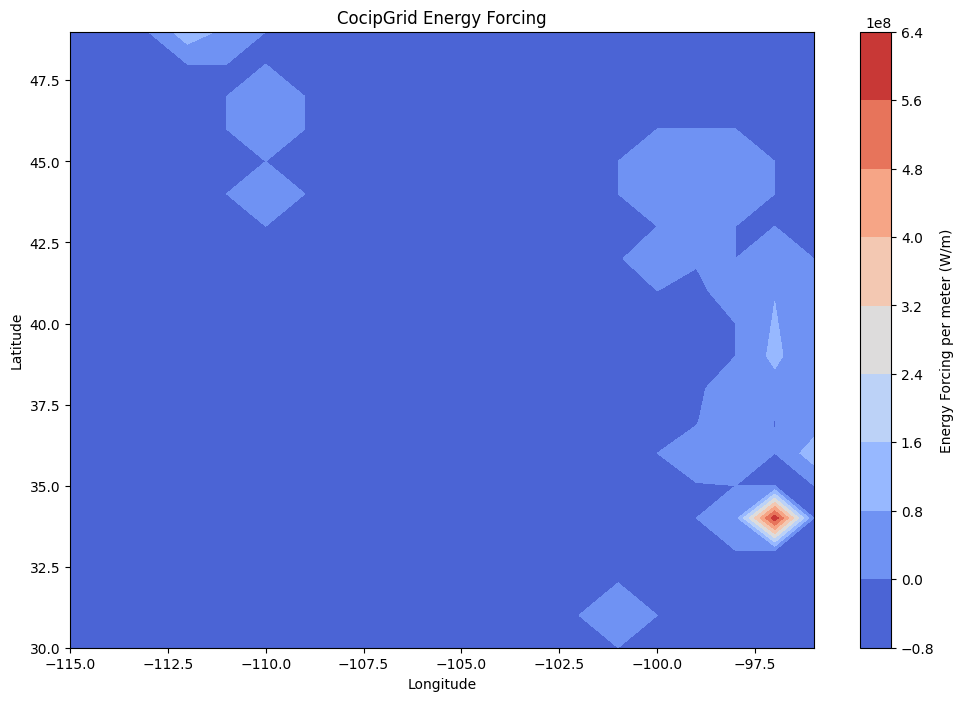

In [41]:
# Plot results
plt.figure(figsize=(12, 8))
ef_per_m = result.data["ef_per_m"].isel(time=0, level=0)
plt.contourf(result.data.longitude, result.data.latitude, ef_per_m, cmap="coolwarm")
plt.colorbar(label="Energy Forcing per meter (W/m)")
plt.title("CocipGrid Energy Forcing")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [42]:
result

MetDataset with data:

<xarray.Dataset> Size: 87kB
Dimensions:       (longitude: 20, latitude: 20, level: 2, time: 9)
Coordinates:
  * longitude     (longitude) float64 160B -115.0 -114.0 -113.0 ... -97.0 -96.0
  * latitude      (latitude) float64 160B 30.0 31.0 32.0 33.0 ... 47.0 48.0 49.0
  * level         (level) float64 16B 250.0 300.0
  * time          (time) datetime64[ns] 72B 2022-03-01 ... 2022-03-02
    air_pressure  (level) float32 8B 2.5e+04 3e+04
    altitude      (level) float32 8B 1.036e+04 9.164e+03
Data variables:
    contrail_age  (longitude, latitude, level, time) float32 29kB 0.0 ... 0.0
    ef_per_m      (longitude, latitude, level, time) float64 58kB 0.0 ... 0.0
Attributes: (12/13)
    humidity_scaling_name:     histogram_matching
    humidity_scaling_formula:  era5_quantiles -> iagos_quantiles
    azimuth:                   0.0
    segment_length:            1000.0
    met_source_provider:       ECMWF
    met_source_dataset:        ERA5
    ...                        ...
    aircraft_type:             B737
    description:               Gridded Contrail Cirrus Prediction Model
    max_age:                   20 hours
    dt_integration:            30 minutes
    pycontrails_version:       0.54.0
    ap_model:                  PSGrid

In [43]:
# work with the results
print("Mean Energy Forcing per meter:", ef_per_m.mean().item())
print("Max Energy Forcing per meter:", ef_per_m.max().item())
print("Min Energy Forcing per meter:", ef_per_m.min().item())

contrail_age = result.data["contrail_age"].isel(time=0, level=0)
print("Mean Contrail Age:", contrail_age.mean().item())

Mean Energy Forcing per meter: 3626066.1523160664
Max Energy Forcing per meter: 615089695.7354624
Min Energy Forcing per meter: -16682450.716573667
Mean Contrail Age: 0.1274999976158142
